

### Key Concepts:
- **Z-Score Method**: Identifies outliers by checking if the Z-score (standard deviation units) is greater than 3.
- **Interquartile Range (IQR)**: Defines outliers as those outside the 1.5 * IQR range from the Q1 and Q3 quantiles.
- **Removing Outliers**: Simply filters out rows that fall outside the identified boundaries.
- **Capping (Winsorization)**: Limits extreme values to the specified boundaries.
- **Imputation**: Replaces outliers with statistical values like the median.
scale.

- **DBSCAN**: A clustering method that detects outliers based on density.


In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import PowerTransformer

In [5]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
data = {
    'Feature1': np.random.normal(50, 5, 1000).tolist() + [100, 120],  # Adding outliers
    'Feature2': np.random.normal(60, 10, 1000).tolist() + [200, 250]  # Adding outliers
}
df = pd.DataFrame(data)
original_df = df.copy()

In [6]:
df

,Feature1,Feature2
0,52.483571,73.993554
1,49.308678,69.246337
2,53.238443,60.596304
3,57.615149,53.530632
4,48.829233,66.982233
...,...,...
997,53.204214,51.181253
998,47.144105,58.369330
999,52.862914,52.550974
1000,100.000000,200.000000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Feature1          1002 non-null   float64
 1   Feature2          1002 non-null   float64
 2   Z_Score_Feature1  1002 non-null   float64
 3   Z_Score_Feature2  1002 non-null   float64
 4   Cluster_DBSCAN    1002 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 39.3 KB


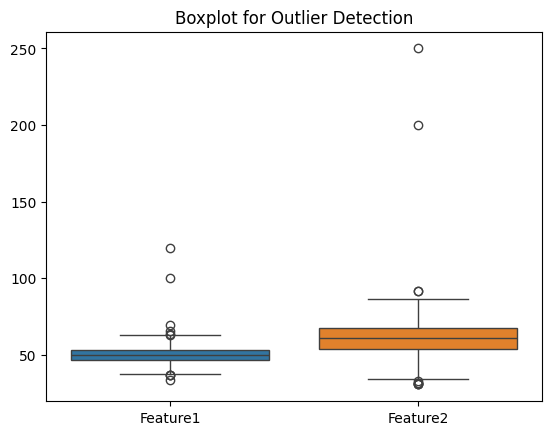

In [7]:
# Visualize outliers using boxplot
sns.boxplot(data=df)
plt.title('Boxplot for Outlier Detection')
plt.show()

# Z-Score method for detecting outliers

:

### Z-score Calculation:

The Z-score is a statistical measure that tells us how many standard deviations a data point is from the mean of the dataset. The formula for the Z-score of a value \(X\) in a dataset is:

$[
Z = \frac{X - \mu}{\sigma}
]$

Where:
- \(X\) is the value,
- $(\mu)$ is the mean of the dataset,
- $(\sigma)$ is the standard deviation of the dataset.

The Z-score helps to identify how far away a particular value is from the mean. A Z-score greater than 3 or less than -3 (typically) indicates that the value is far enough from the mean to be considered an **outlier**.

### Code Explanation:

```python
from scipy.stats import zscore
```
This line imports the **zscore** function from the `scipy.stats` module, which is used to calculate the Z-scores of the values in a column.

```python
df['Z_Score_Feature1'] = zscore(df['Feature1'])
df['Z_Score_Feature2'] = zscore(df['Feature2'])
```

These two lines calculate the Z-scores for each value in the `Feature1` and `Feature2` columns of the DataFrame `df`.

- **`zscore(df['Feature1'])`**: This calculates the Z-score for each value in the `Feature1` column. The result is a new series where each value represents how many standard deviations the original value is from the mean.
- **`df['Z_Score_Feature1']`**: This assigns the calculated Z-scores for `Feature1` to a new column in the DataFrame called `Z_Score_Feature1`.

The same is done for `Feature2`, where the Z-scores are stored in the new column `Z_Score_Feature2`.

### Outcome:

- After running this code, the DataFrame `df` will have two new columns: `Z_Score_Feature1` and `Z_Score_Feature2`. These columns contain the Z-scores for each data point in the corresponding features.
- You can then inspect the Z-scores to identify outliers. For example, if the absolute value of a Z-score is greater than 3, that data point can be considered an outlier.

### Example:
If a value in `Feature1` has a Z-score of 4, it means that the value is 4 standard deviations away from the mean, which is quite far and suggests it could be an outlier.

---


In [8]:

from scipy.stats import zscore

df['Z_Score_Feature1'] = zscore(df['Feature1'])
df['Z_Score_Feature2'] = zscore(df['Feature2'])



In [26]:
df.head(20)

,Feature1,Feature2,Z_Score_Feature1,Z_Score_Feature2,Cluster_DBSCAN
0,52.483571,73.993554,0.405610,1.043417,0
1,49.308678,69.246337,-0.162354,0.661135,0
2,53.238443,60.596304,0.540651,-0.035431,0
3,57.615149,53.530632,1.323610,-0.604412,0
4,48.829233,66.982233,-0.248123,0.478812,0
5,48.829315,63.934854,-0.248108,0.233414,0
6,57.896064,68.951932,1.373863,0.637428,0
7,53.837174,66.351718,0.647759,0.428039,0
8,47.652628,70.495527,-0.458608,0.761730,0
9,52.712800,54.647648,0.446617,-0.514462,0


# Identify outliers (absolute Z-Score > 3)


In [9]:
df_outliers_zscore = df[(df['Z_Score_Feature1'].abs() > 3) | (df['Z_Score_Feature2'].abs() > 3)]
print("Outliers detected using Z-Score method:")
print(df_outliers_zscore)

Outliers detected using Z-Score method:
        Feature1    Feature2  Z_Score_Feature1  Z_Score_Feature2
209    69.263657   77.495767          3.407437          1.325442
1000  100.000000  200.000000          8.905930         11.190411
1001  120.000000  250.000000         12.483775         15.216790


# IQR method for detecting outliers

In [10]:

Q1 = df[['Feature1', 'Feature2']].quantile(0.25)
Q3 = df[['Feature1', 'Feature2']].quantile(0.75)
IQR = Q3 - Q1

# Outliers lie beyond the lower and upper bounds for each column


In [11]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Apply the conditions column by column


In [12]:
df_outliers_iqr = df[((df['Feature1'] < lower_bound['Feature1']) | (df['Feature1'] > upper_bound['Feature1'])) |
                     ((df['Feature2'] < lower_bound['Feature2']) | (df['Feature2'] > upper_bound['Feature2']))]
print("Outliers detected using IQR method:")
print(df_outliers_iqr)

Outliers detected using IQR method:
        Feature1    Feature2  Z_Score_Feature1  Z_Score_Feature2
61     49.071705   31.514574         -0.204746         -2.377312
74     36.901274   69.962668         -2.381942          0.718820
101    47.896773   31.037446         -0.414932         -2.415734
179    63.600846   48.964107          2.394404         -0.972144
209    69.263657   77.495767          3.407437          1.325442
262    33.793663   65.387560         -2.937869          0.350397
478    65.394404   51.125078          2.715258         -0.798126
539    47.115541   31.277378         -0.554689         -2.396413
591    47.611713   30.786495         -0.465928         -2.435943
615    50.646106   91.931076          0.076902          2.487882
646    36.515567   58.128557         -2.450942         -0.234153
668    36.745151   68.406200         -2.409871          0.593481
750    45.383834   32.967677         -0.864478         -2.260297
755    63.161910   73.736585          2.315882        

# Remove outliers using IQR

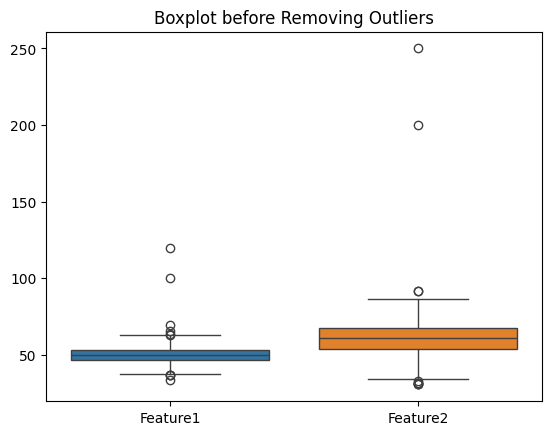

In [13]:




sns.boxplot(data=original_df)
plt.title('Boxplot before Removing Outliers')
plt.show()

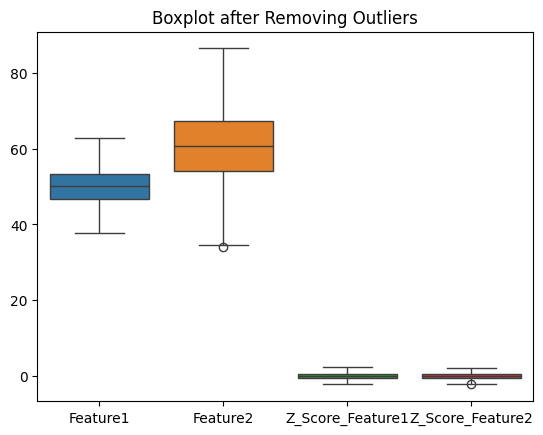

In [14]:

df_no_outliers = df[~((df['Feature1'] < lower_bound['Feature1']) |
                      (df['Feature1'] > upper_bound['Feature1']) |
                      (df['Feature2'] < lower_bound['Feature2']) |
                      (df['Feature2'] > upper_bound['Feature2']))]
sns.boxplot(data=df_no_outliers)
plt.title('Boxplot after Removing Outliers')
plt.show()

In [15]:
df_no_outliers.shape

(984, 4)

# Cap outliers using IQR limits (Winsorization)

In [16]:
# clip replaces values less than min with min
# clip replaces values greater than max with max

In [17]:

df_capped = df.copy()
df_capped['Feature1'] = np.clip(df['Feature1'], lower_bound['Feature1'], upper_bound['Feature1'])
df_capped['Feature2'] = np.clip(df['Feature2'], lower_bound['Feature2'], upper_bound['Feature2'])


In [18]:
df_capped.shape

(1002, 4)

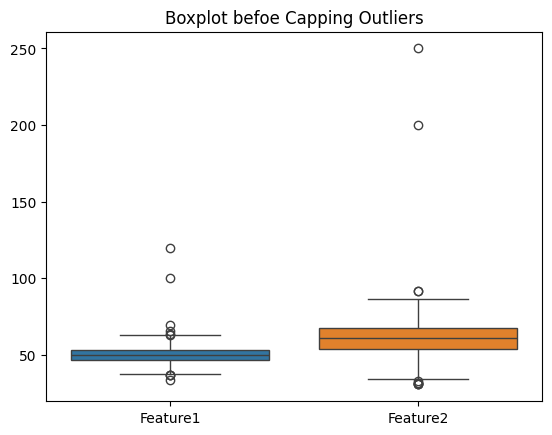

In [19]:
sns.boxplot(data=original_df)
plt.title('Boxplot befoe Capping Outliers')
plt.show()

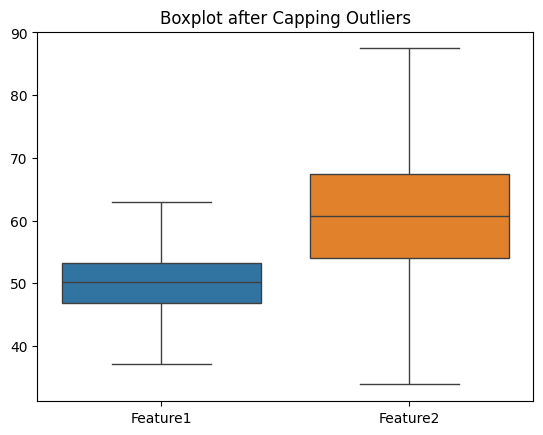

In [20]:
sns.boxplot(data=df_capped[['Feature1','Feature2']])
plt.title('Boxplot after Capping Outliers')
plt.show()

# Replace outliers with median values

In [21]:

median_feature1 = df['Feature1'].median()
median_feature2 = df['Feature2'].median()

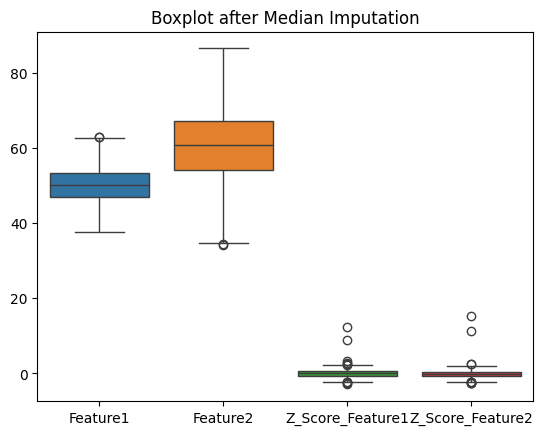

In [22]:
df_imputed = df.copy()
df_imputed['Feature1'] = np.where((df['Feature1'] < lower_bound['Feature1']) | (df['Feature1'] > upper_bound['Feature1']),
                                  median_feature1, df['Feature1'])
df_imputed['Feature2'] = np.where((df['Feature2'] < lower_bound['Feature2']) | (df['Feature2'] > upper_bound['Feature2']),
                                  median_feature2, df['Feature2'])

sns.boxplot(data=df_imputed)
plt.title('Boxplot after Median Imputation')
plt.show()


In [23]:
df_imputed.shape

(1002, 4)

# DBSCAN for outlier detection

In [24]:

dbscan = DBSCAN(eps=3, min_samples=5)
df['Cluster_DBSCAN'] = dbscan.fit_predict(df[['Feature1', 'Feature2']])



# Visualize clusters

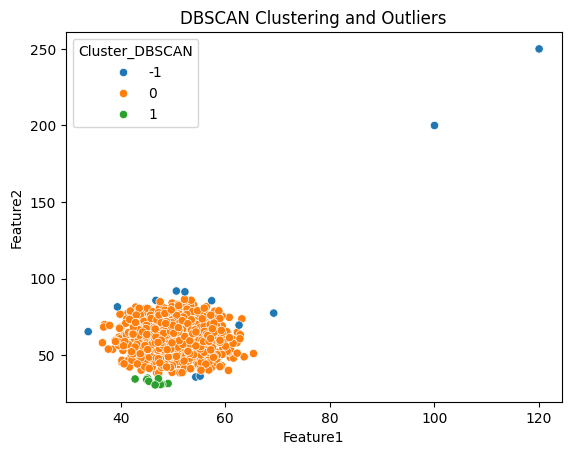

In [25]:

sns.scatterplot(data=df, x='Feature1', y='Feature2', hue='Cluster_DBSCAN', palette='tab10')
plt.title('DBSCAN Clustering and Outliers')
plt.show()